In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pylab as plt
import skfuzzy as fuzz
import os
from numpy import loadtxt
from scipy import signal
from sklearn.cluster import KMeans
#import peakutils as pu
#from peakutils.plot import plot as pplot
from sklearn import preprocessing
%matplotlib inline
import scipy
from scipy.cluster.hierarchy import fclusterdata, linkage, fcluster, dendrogram
import matplotlib.colors as colors
import matplotlib.gridspec as gridspec
import ternary
import time
import peakutils
from dtw import dtw
from collections import Counter
from pyemd import emd
import time
label_size = 12
plt.rcParams["font.family"] = "Times New Roman"
#plt.rcParams["font.family"] = "serif"
plt.rcParams['image.cmap'] = 'jet'
plt.rcParams.update({'font.size':label_size, 'font.weight':'bold'})
tick_size = 12
dpi = 300
params = {'axes.labelsize': label_size,'axes.titlesize':label_size, 'legend.fontsize': label_size-2, 'xtick.labelsize': tick_size, 'ytick.labelsize': tick_size, 'axes.labelweight':'bold'}
plt.rcParams.update(params)
% matplotlib inline

In [2]:
#%% Ternary plotting setup
%run "ternarpy_plot_setup.py"

In [3]:
error=.01
m=1.3
maxiter=500
path="Achari-0119/110917A_FCM_clustering_20181110"
sample_name = '110917A'
SEED=2
comps = ['Co', 'Ni', 'Ta']
path="Achari-0119/112417A_FCM_clustering_20190118"
sample_name = '112417A'
SEED=1
comps = ['Co', 'Ti', 'Ta']

In [4]:
xrd_xy=np.loadtxt(path+'/'+'xrd_xy.txt')
datas=np.loadtxt(path+'/'+'datas.txt')
atomratios=np.loadtxt(path+'/'+'atomratios.txt')
q=np.genfromtxt(path+'/'+'q.txt')
print datas.shape,atomratios.shape,q.shape, xrd_xy.shape

(1533, 1450) (1533, 3) (1450,) (1533, 2)


In [5]:
sum(datas[10,:])

1.0000000000000004

([<matplotlib.lines.Line2D at 0x7f9c3398c050>], 1.0000000000000009)

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'Times New Roman'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


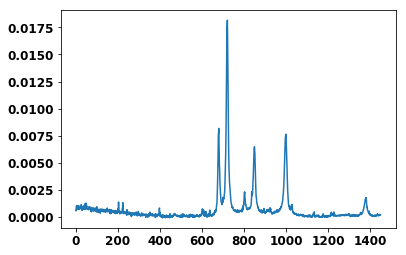

In [6]:
i=1500
plt.plot(datas[i,:]),sum(datas[i,:])

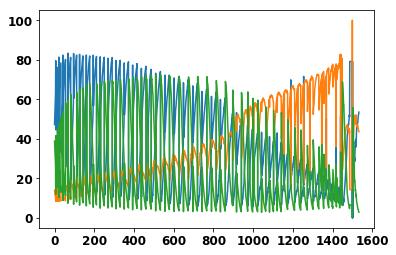

In [7]:
plt.plot(atomratios[:,:]);

In [8]:
cols=datas.shape[1]
rows=datas.shape[0]
print(rows,cols)

(1533, 1450)


In [9]:
ones=np.ones_like(datas[10,:])
q.shape, ones.shape ,max(q),min(q)

((1450,), (1450,), 4.2988628999999996, 1.0034114000000001)

In [10]:
# #%% Plot the XRD data with q axis
# count=1
# plot_data=plt.figure(figsize=(6,10))
# for i in range(0,rows):
#     plt.scatter(q,
#                 ones*count,
#                 marker='.',
#                 norm=mpl.colors.LogNorm(),
#                 cmap='hot_r',
#                 s=1,
# #                vmin=1e1,
#                 c=datas[i,:],
#                 alpha=.8)
#     count+=1
# plt.xlim(1,4.2)
# plt.ylim(0,rows)
# plt.colorbar(shrink=0.25,aspect=8)
# #clb.ax.set_title('$Counts\ (a.u)$')
# plt.xlabel('Q ($\AA^{-1}$)')
# plt.ylabel('XRD Scan number')
# plt.show()

In [11]:
# #%%
# plot_data.savefig(path+'/'+'plot_data.png',dpi=300,bbox_inches='tight')

In [12]:
datas.shape

(1533, 1450)

In [13]:
alldata = datas.T

In [14]:
#%% Set up fuzzy clustering loop and plot
alldata = datas.T
fpcs = []
ps=[]
ones=np.ones_like(datas[10,:])
np.random.seed(1)
for ncenters in range(1,2):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        alldata, ncenters,m, error=error, maxiter=maxiter, init=None)
    fpcs.append(fpc)
    ps.append(p)
    cluster_membership = np.argmax(u, axis=0)
    #print(ncenters, sep=',', end=',', flush=True)
    print ncenters,

1


Text(0.5,0,'Number of clusters')

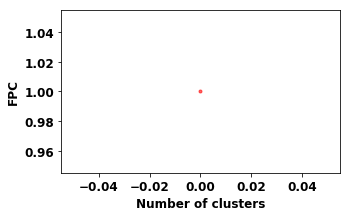

In [15]:
#%%Plotting
plot_fpcs=plt.figure(figsize=(5,3))
# plt.subplot(1,3,1)
# plt.semilogy(fpcs,'r.',alpha=0.6)
# plt.semilogy(fpcs,'k-',lw=1,alpha=0.2)
# plt.ylabel('FPC')
# plt.xlabel('Number of clusters')
# plt.ylim(0.1,1)
plt.subplot(1,1,1)
plt.plot(fpcs,'r.',alpha=.6)
plt.plot(fpcs,'k-',lw=1,alpha=0.2)
plt.ylabel('FPC')
plt.xlabel('Number of clusters')
# # plt.ylim(0.1,1)
# plt.subplot(1,3,3)
# plt.loglog(fpcs,'r.',alpha=.6)
# plt.loglog(fpcs,'k-',lw=1,alpha=0.2)
# plt.ylabel('FPC')
# plt.xlabel('Number of clusters')
# # plt.ylim(0.1,1)

In [16]:
#%%
plot_fpcs.savefig(path+'/'+'plot_fpcs_%.2f_%.3f_%d.png'%(m, error, maxiter),dpi=300,bbox_inches='tight')

In [17]:
#%% Run th clustering with the number of clusters identified with best fpcs.
k=20 #number of clusters
np.random.seed(SEED)    
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(alldata, k, m, error=error, maxiter=maxiter, init=None)   
# the value 'u' contains the information about the membership of the each data set in each cluster.
membership=u.T

In [18]:
np.savetxt(path+'/'+'membership.txt',membership)
k=20 #number of clusters
membership=np.genfromtxt(path+'/'+'membership.txt')
print membership.shape, np.amax(datas), np.amin(datas)

(1533, 20) 0.104371587354 -0.000633406812904


In [19]:
# #%% 
# plot_data_cluster=plt.figure(figsize=(12,7))
# plt.subplot(1,3,2)
# count=0 
# ns=50 #numberof scans to plot
# for i in range(0,ns):
#     plt.scatter(q,
#                 ones*count,
#                 marker='|',
#                 norm=mpl.colors.LogNorm(),
#                 cmap='hot',
#                 s=200,
# #                vmin=1e1,
#                 c=datas[i,:],
#                 alpha=1)
#     count+=1
# plt.xlim(1,4.2)
# plt.ylim(0,ns)
# plt.colorbar(shrink=0.25,aspect=8)
# #clb.ax.set_title('$Counts\ (a.u)$')
# plt.xlabel('Q ($\AA^{-1}$)')
# plt.ylabel('XRD Scan number')
# plt.subplot(1,3,1)
# plt.imshow(membership,origin=rows,aspect=2.5*k/ns,cmap='Greens',norm=mpl.colors.LogNorm(),vmin=0.1,vmax=1)
# plt.xlabel('k')
# plt.ylim(0,ns)
# plt.colorbar(shrink=0.25,aspect=8)
# plt.tight_layout()

In [20]:
# #%%
# plot_data_cluster.savefig(path+'/'+'plot_data_cluster.png',dpi=300,bbox_inches='tight')

In [21]:
membership.shape

(1533, 20)

[[ 0.14058435  0.14081677  0.13525011 ...,  0.09568378  0.08639577
   0.09180451]
 [ 0.06448087  0.0521205   0.04164799 ...,  0.15682996  0.15116728
   0.15307501]
 [ 0.15019301  0.15087091  0.14620954 ...,  0.11097691  0.10300323
   0.10779332]
 ..., 
 [ 0.15456897  0.15495478  0.14941453 ...,  0.08468202  0.07525551
   0.08222881]
 [ 0.17343344  0.17365576  0.16879249 ...,  0.10107736  0.09716547
   0.10318193]
 [ 0.15827081  0.15886737  0.15376988 ...,  0.10078769  0.09266401
   0.09814026]]


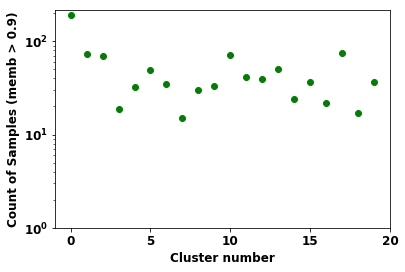

In [22]:
#%% Scan the membershop array to see which clusters got higher values
point_in_clusters=np.zeros((rows,k))
for i in range(k):
    count=1
    for j in range(rows):
        if membership[j,i]>0.9:
            point_in_clusters[count,i]=j
            count+=1
    point_in_clusters[0,i]=count
#    print(count)
plot_point_in_clusters=plt.figure()
plt.semilogy(point_in_clusters[0,:],'go')
plt.ylim(1e0)
plt.xticks(range(0,k+1,5))
plt.xlabel('Cluster number')
plt.ylabel('Count of Samples (memb > 0.9)')
print d

In [23]:
#%%
plot_point_in_clusters.savefig(path+'/'+'plot_point_in_clusters.png',dpi=300,bbox_inches='tight')

(1.0034114000000001, 4.2988628999999996)

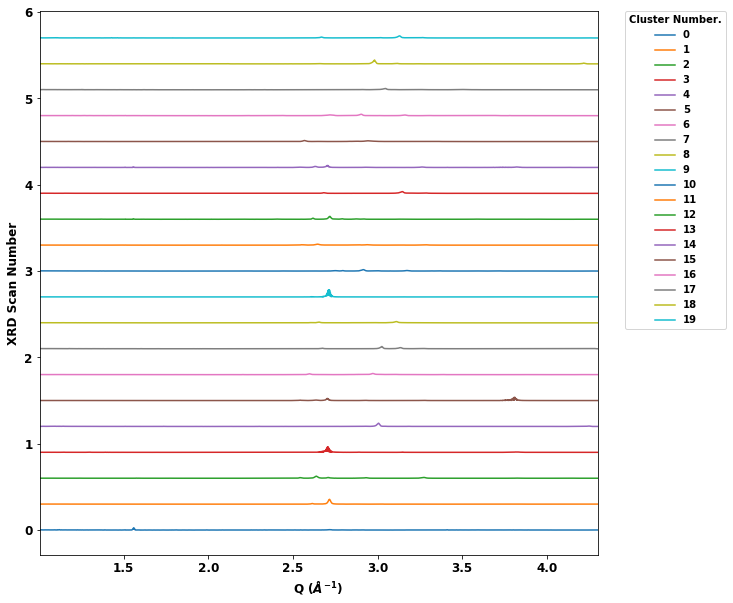

In [24]:
#%% Plot sample data from each cluster
mul=1 #Multiplication factor for shift
add=.3
plot_clusters_XRD=plt.figure(figsize=(10,10))
[plt.plot(q,datas[membership[:,i].argmax(axis=0),:]+add*i,label=i) for i in range(k)]
plt.xlabel('Q ($\AA^{-1}$)')
plt.ylabel('XRD Scan Number')
plt.legend(title="Cluster Number.",bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
#plt.xlim(1.0,4.2)
plt.xlim(min(q),max(q))
#plt.colorbar()

In [25]:
#%%
plot_clusters_XRD.savefig(path+'/'+'plot_clusters_XRD.png',dpi=300,bbox_inches='tight')

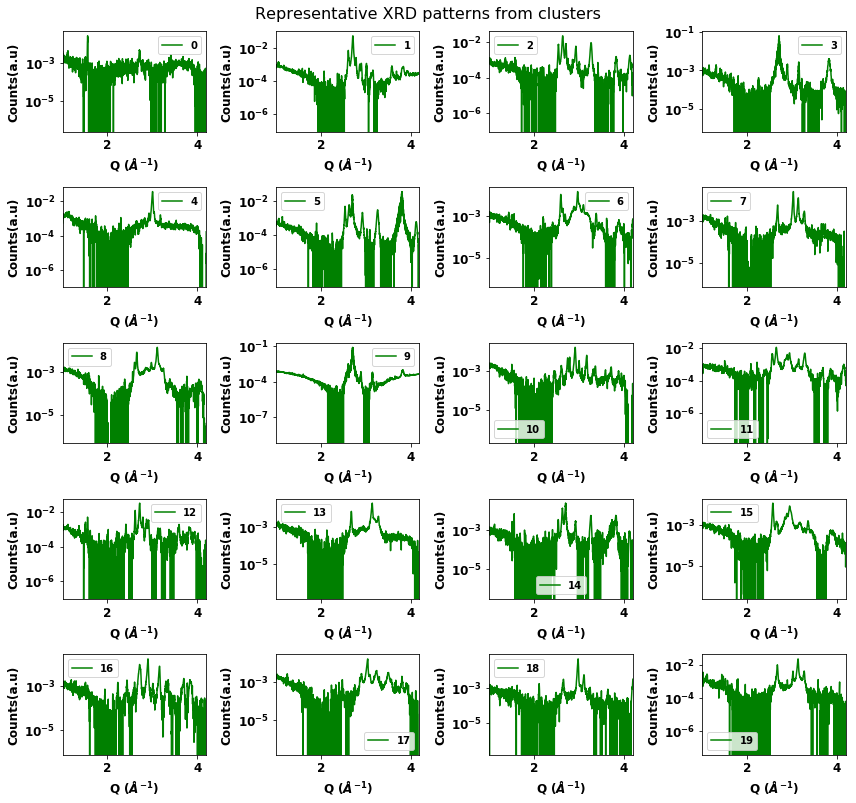

In [26]:
#%%
plot_clusters_XRD_seperate=plt.figure(figsize=(12,11))
for i in range(k):
    plt.subplot(5,4,i+1)
    plt.semilogy(q,datas[membership[:,i].argmax(axis=0),:],label=i,color='g')
    plt.xlim(1,4.2)
#    plt.ylim(.1,100) 
    plt.legend()
    plt.xlabel('Q ($\AA^{-1}$)')
    plt.ylabel('Counts(a.u)')
    plt.tight_layout()
plt.suptitle('Representative XRD patterns from clusters',y=1.01,fontsize=16)
plt.show()

In [27]:
#%%
plot_clusters_XRD_seperate.savefig(path+'/'+'plot_clusters_XRD_seperate.png',dpi=300,bbox_inches='tight')

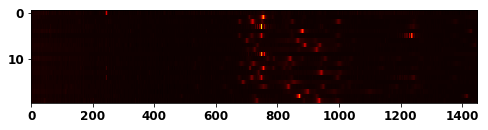

In [28]:
#%% Generate a data set which representing all the clusters
XRD_cluster_rep=np.zeros((k,alldata.shape[0]))
for i in range(k):
    XRD_cluster_rep[i,:]=datas[membership[:,i].argmax(axis=0),:]
plot_XRD_cluster_rep=plot_XRD_cluster_rep=plt.figure(figsize=(8,8))
plt.imshow(XRD_cluster_rep,aspect=15,cmap='hot');
# plt.xlim(50,150)

In [29]:
#%%
np.savetxt(path+'/'+'XRD_cluster_rep.txt',XRD_cluster_rep)
plot_XRD_cluster_rep.savefig(path+'/'+'plot_XRD_cluster_rep.png',dpi=300,bbox_inches='tight')

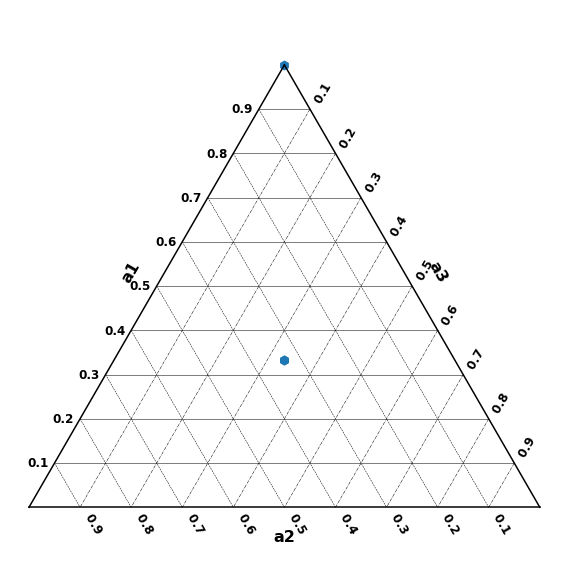

[[ 10  20  70]
 [100   0   0]
 [ 60  40   0]]


In [30]:
basis = make_basis()
rat=np.array([[10,20,70],[100,0,0],[60,40,0]])
ratt = transform(rat,basis)
a1,a2,a3='a1','a2','a3'
plot_ternary=plt.figure(figsize=(8,8))
ax=pylab.subplot(1,1,1)
setup_plot(ax, side_labels=[a1,a2,a3], grid_values=np.arange(0.1,1,0.1))
ax.scatter(ratt[:,0],ratt[:,1],
           marker='h',
           s=80
             );
plt.tight_layout()
plt.show()
print(rat)

In [31]:
basis = make_basis()
A123=atomratios[:]
A123t = transform(A123[:,0:3],basis)
a1,a2,a3=comps

In [32]:
datas.shape, A123.shape,membership.shape

((1533, 1450), (1533, 3), (1533, 20))

In [33]:
rows

1533

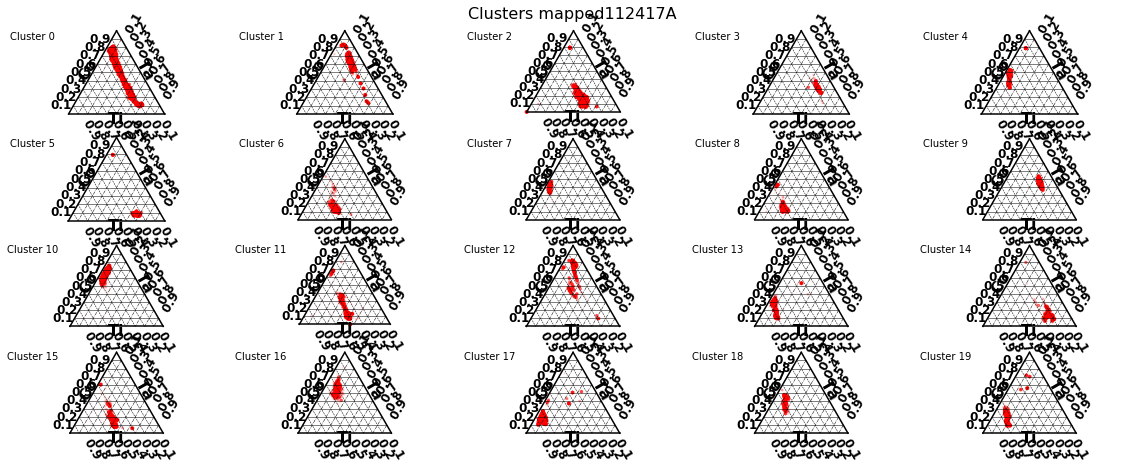

In [34]:
plot_ternary_clusters_maped_seperate=plt.figure(figsize=(16,9))

#%%
rows=datas.shape[0]
rgba_colors = np.zeros((rows,4))
# for red the first column needs to be one
rgba_colors[:,0] = 1
#rgba_colors[:,1] = 1
#rgba_colors[:,2] = 1

#for i in range(1):
for i in range(k):
    alphas=membership[:,i]
    # the fourth column needs to be your alphas
    rgba_colors[:, 3] = alphas    
    ax=pylab.subplot(6,5,i+1)
    setup_plot(ax, side_labels=[a1,a2,a3], grid_values=np.arange(0.1,1,0.1))
    ax.scatter(A123t[:,0],A123t[:,1],
                 marker='h',
                 s=20*alphas,
                 color=rgba_colors,
                 lw=0,
                 edgecolor='none'
                 );
    plt.title('Cluster '+str(i),x=0.1,y=0.8,fontsize=10)
    plt.tight_layout()
plt.suptitle('Clusters mapped'+sample_name,y=1.01,fontsize=16);

In [35]:
#%%
plot_ternary_clusters_maped_seperate.savefig(path+'/'+'plot_ternary_clusters_maped_seperate.png',dpi=300,bbox_inches='tight')

(1533, 3) (1533, 20) 20
order is 0 1 2 for CoTiTa
using existing axis
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 putting legend
showing


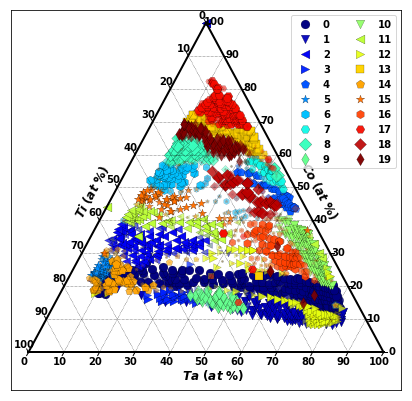

In [36]:
# Plots a set of data on a ternary plot with colors corresponding to their labels.
#
# Input
# data    : a 2-D array of data that contains ternary coordinates.
# labels  : a 1-D array of integers that denotes the cluster each corresponding data belongs to.
#
# Output
# - nothing. Plots the ternary data.
import matplotlib.tri as tri
def ax_ternary(A123, membership, k, ax=None, colors=None, markers=None, fig_name=None, save_dir=None):
    print A123.shape, membership.shape, k
    axo = False
    scale =100
    if sample_name == '110917A':
        print 'order is 0 2 1 for CoNiTa'
        points=A123[:,[0,2,1]]
    elif sample_name == '112417A':
        print 'order is 0 1 2 for CoTiTa'
        points=A123[:,[0,1,2]]
    if ax is None:
        figure0, tax = ternary.figure(scale=scale)
        figure0.set_size_inches(10, 10)
        ax = tax.get_axes()
    else:
        print 'using existing axis'
        axo = True
        figure, tax = ternary.figure(ax=ax, scale=scale)
    # Draw Boundary and Gridlines
    tax.boundary(linewidth=2.0)
    tax.gridlines(color='k', multiple=10)
    # Set Axis labels and Title
    
    if colors is None:
        colors = iter(mpl.cm.jet(np.linspace(0, 1, k)))
    if markers is None:
        markers=('o','v','<','>','p','*','h','H','D','d','v','<','>','s','p','*','h','H','D','d','>','p','*','h')
        while len(markers)< k: markers = markers + markers
    elif len(markers)==1:
        markers = markers * total_clusters
    if sample_name == '110917A':
        tax.left_axis_label("$Co\ (at\ \\%)$", fontsize=12)
        tax.right_axis_label("$Ta\ (at\ \\%)$", fontsize=12)
        tax.bottom_axis_label("$Ni\ (at\ \\%)$", fontsize=12,offset=-0.07)
    elif sample_name == '112417A':
        tax.left_axis_label("$Ti\ (at\ \\%)$", fontsize=12)
        tax.right_axis_label("$Co\ (at\ \\%)$", fontsize=12)
        tax.bottom_axis_label("$Ta\ (at\ \\%)$", fontsize=12,offset=-0.07)
        
    for i in range(k):
        c=next(colors)
        print i,
        lastind = 0
        for j in range(membership.shape[0]):
            if membership[j,i]<=0.01: continue
            if membership[j,i]>=0.9: lastind = j
            tax.scatter([points[j]], marker=markers[i], s=int(80*membership[j,i]),
            lw=0.2, c=c, alpha=int(100*membership[j,i])/100., edgecolor='k')
        tax.scatter([points[lastind]], marker=markers[i], s=int(80*membership[lastind,i]),
            lw=0.2, c=c, alpha=int(100*membership[lastind,i])/100., edgecolor='k', label=i);


    tax.ticks(axis='lbr', multiple=10,linewidth=1)
    tax.legend(loc='upper right', ncol=2)
    tax.clear_matplotlib_ticks()
    if fig_name:
        fig = plt.gcf()
        fig.set_size_inches(7, 7)
        os.system('mkdir -p '+save_dir)
        fig_path = os.path.join(save_dir, fig_name)
        plt.savefig(fig_path)
        print 'saved to ', fig_path
        plt.show()
        plt.close()
    if not axo:
        plt.show()
        plt.close()
    return
    #tax.show()
    #tax.close()
plot_ternary_clusters_maped=plt.figure(figsize=(10,10))
ax=plt.subplot(1,1,1)
ax_ternary(A123, membership, k, ax=ax, colors=None)
print 'putting legend'
#plt.legend(title="Cluster Number.",bbox_to_anchor=(1.05, .9))
#plt.suptitle('Clusters mapped_together_'+sample_name,y=1.01,fontsize=16)
#plt.tight_layout()
print 'showing'
fig = plt.gcf()
fig.set_size_inches(7, 7)
plt.show()
#print d

In [37]:
# #%%
# rows=datas.shape[0]
# rgba_colors = np.zeros((rows,4))
# # for red the first column needs to be one
# #rgba_colors[:,0] = 0
# #rgba_colors[:,1] = 0
# #rgba_colors[:,2] = 0

# colors = iter(mpl.cm.jet(np.linspace(0, 1, k)))

# plot_ternary_clusters_maped=plt.figure(figsize=(11,11))
# ax=pylab.subplot(1,1,1)
# setup_plot(ax, side_labels=[a1,a2,a3], grid_values=np.arange(0.1,1,0.1))

# for i in range(k):
#     alphas=membership[:,i]  # the fourth column needs to be your alphas
#     rgba_colors[:, 3] = alphas
#     ax.scatter(A123t[:,0],A123t[:,1],
#                marker='h',
# #                 marker=markers[i],
#                  s=80*membership[:,i],
#                  c=next(colors),
#                  lw=0.1,
#                  edgecolor='w',
#                  label=i
#                  );
# #    print('Cluster '+str(i))
# plt.legend(title="Cluster Number.",bbox_to_anchor=(1.05, .9), loc=2, borderaxespad=0)
# plt.suptitle('Clusters mapped_together_'+sample_name,y=1.01,fontsize=16)
# plt.tight_layout()
# plt.show()

In [38]:
#%% filter cluster maping based on its value
#membership=np.genfromtxt(path+'/'+'membership.txt')
membership_filtered = np.empty_like(membership)
membership_filtered[:] = membership
mask=(0.95>membership)
membership_filtered[mask]=0

markers=('o','v','<','>','p','*','h','H','D','d','o','v','<','>','s','p','*','h','H','D','d')
markers=markers+markers

In [39]:
# #%%
# rows=datas.shape[0]
# rgba_colors = np.zeros((rows,4))
# # for red the first column needs to be one
# #rgba_colors[:,0] = 0
# #rgba_colors[:,1] = 0
# #rgba_colors[:,2] = 0

# colors = iter(mpl.cm.jet(np.linspace(0, 1, k)))

# plot_ternary_clusters_maped_markers=plt.figure(figsize=(11,11))
# ax=pylab.subplot(1,1,1)
# setup_plot(ax, side_labels=[a1,a2,a3], grid_values=np.arange(0.1,1,0.1))

# for i in range(k):
#     alphas=membership[:,i]  # the fourth column needs to be your alphas
#     rgba_colors[:, 3] = alphas
#     ax.scatter(A123t[:,0],A123t[:,1],
# #               marker='h',
#                  marker=markers[i],
#                  s=120*membership[:,i],
#                  c=next(colors),
#                  lw=0.3,
#                  edgecolor='k',
#                  label=i,
#                  );
# #    print('Cluster '+str(i))
# plt.legend(title="Cluster Number.",bbox_to_anchor=(1.05, .9), loc=2, borderaxespad=0)
# plt.suptitle('Clusters mapped_together_'+sample_name,y=1.01,fontsize=16)
# plt.tight_layout()
# plt.show()

In [40]:
# #%%
# plot_ternary_clusters_maped_markers.savefig(path+'/'+'plot_ternary_clusters_maped_markers.png',dpi=200,bbox_inches='tight')

(1533, 3) (1533, 20) 20
order is 0 1 2 for CoTiTa
using existing axis
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19

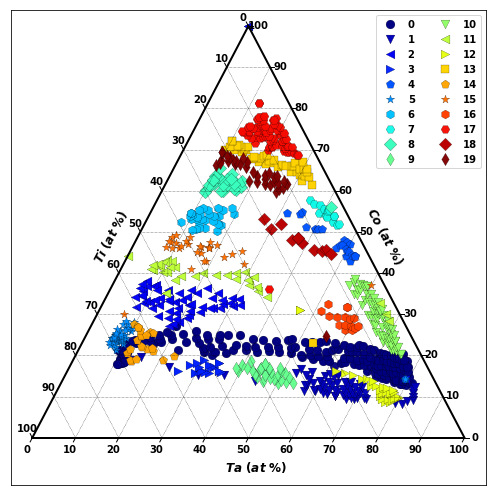

In [41]:
#%%
rows=datas.shape[0]
rgba_colors = np.zeros((rows,4))
# for red the first column needs to be one
#rgba_colors[:,0] = 0
#rgba_colors[:,1] = 0
#rgba_colors[:,2] = 0

colors = iter(mpl.cm.jet(np.linspace(0, 1, k)))

plot_ternary_clusters_maped_filtered_markers=plt.figure(figsize=(7,7))
ax=pylab.subplot(1,1,1)
ax_ternary(A123, membership_filtered, k, ax=ax, colors=colors)
# setup_plot(ax, side_labels=[a1,a2,a3], grid_values=np.arange(0.1,1,0.1))

# for i in range(k):
#     alphas=membership_filtered[:,i]  # the fourth column needs to be your alphas
#     rgba_colors[:, 3] = alphas
#     ax.scatter(A123t[:,0],A123t[:,1],
# #                 marker='h',
#                  marker=markers[i],
#                  s=80*membership_filtered[:,i],
# #                  s=80,
#                  c=next(colors),
#                  lw=0.3,
#                  edgecolor='k',
#                  label=i,
#                  );
# #    print('Cluster '+str(i))
# plt.legend(title="Cluster Number.",bbox_to_anchor=(1.05, .9), loc=2, borderaxespad=0)
# plt.suptitle('Clusters mapped_together_membership>0.95_'+sample_name,y=1.01,fontsize=16)
plt.tight_layout()
plt.show()

In [42]:
#%%
plot_ternary_clusters_maped_filtered_markers.savefig(path+'/'+'plot_ternary_clusters_maped_filtered_markers.png',dpi=200,bbox_inches='tight')

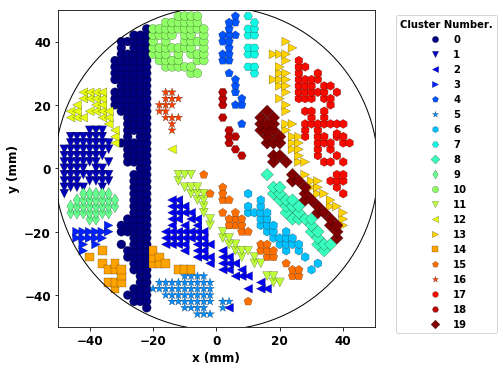

In [100]:
#%% Map on wafer
rows=datas.shape[0]
rgba_colors = np.zeros((rows,4))
# for red the first column needs to be one
#rgba_colors[:,0] = 0
#rgba_colors[:,1] = 0
#rgba_colors[:,2] = 0

colors = iter(mpl.cm.jet(np.linspace(0, 1, k)))

plot_wafer_clusters_maped_filtered_markers=plt.figure(figsize=(7,7))
ax=pylab.subplot(1,1,1)
circle1=plt.Circle((0,0),51,edgecolor='k',lw=1,facecolor='None')
plt.gcf().gca().add_artist(circle1)


for i in range(k):
    alphas=membership_filtered[:,i]  # the fourth column needs to be your alphas
    rgba_colors[:, 3] = alphas
    ax.scatter(xrd_xy[:,0],xrd_xy[:,1],
#                  marker='o',
                 marker=markers[i],
                 s=80*membership_filtered[:,i],
                 c=next(colors),
                 lw=0.2,
                 edgecolor='k',
                 label=i
                 );
#plt.title('Clusters mapped_together_membership>0.95_'+sample_name,y=1.01,fontsize=16)
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')
ax.set_aspect('equal')
# plt.xlim(-50,50)
# plt.ylim(-50,50)
plt.legend(title="Cluster Number.",bbox_to_anchor=(1.05, 1), loc=2)
plt.tight_layout()
plt.show()

In [44]:
#%%
plot_wafer_clusters_maped_filtered_markers.savefig(path+'/'+'plot_wafer_clusters_maped_filtered_markers.png',dpi=200,bbox_inches='tight')

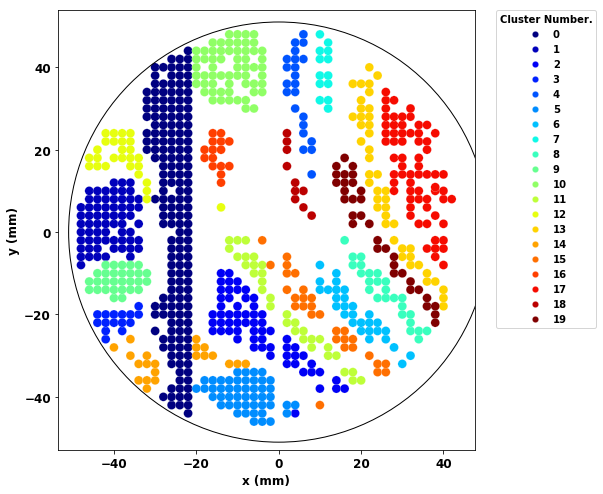

In [45]:
#%% Map on wafer
rgba_colors = np.zeros((rows,4))
# for red the first column needs to be one
#rgba_colors[:,0] = 0
#rgba_colors[:,1] = 0
#rgba_colors[:,2] = 0

colors = iter(mpl.cm.jet(np.linspace(0, 1, k)))

plot_wafer_clusters_maped_filtered_O=plt.figure(figsize=(8,8))
ax=pylab.subplot(1,1,1)
circle1=plt.Circle((0,0),51,edgecolor='k',lw=1,facecolor='None')
plt.gcf().gca().add_artist(circle1)


for i in range(k):
    alphas=membership_filtered[:,i]  # the fourth column needs to be your alphas
    rgba_colors[:, 3] = alphas
    ax.scatter(xrd_xy[:,0],xrd_xy[:,1],
                 marker='o',
#                  marker=markers[i],
                 s=80*membership_filtered[:,i],
                 c=next(colors),
                 lw=0.2,
                 edgecolor='w',
                 label=i
                 );
#plt.title('Clusters mapped_together_membership>0.95_'+sample_name,y=1.01,fontsize=16)
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')
ax.set_aspect('equal')
# plt.xlim(-50,50)
# plt.ylim(-50,50)
plt.legend(title="Cluster Number.",bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.tight_layout()
plt.show()

In [46]:
#%%
plot_wafer_clusters_maped_filtered_O.savefig(path+'/'+'plot_wafer_clusters_maped_filtered_markers_O.png',dpi=200,bbox_inches='tight')

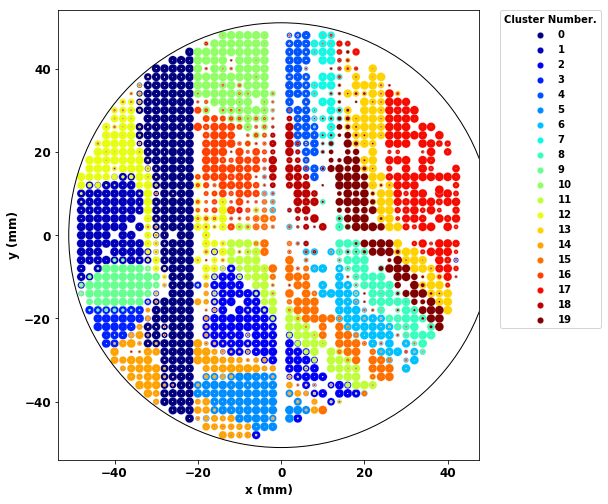

In [47]:
#%% Map on wafer
rgba_colors = np.zeros((rows,4))
# for red the first column needs to be one
#rgba_colors[:,0] = 0
#rgba_colors[:,1] = 0
#rgba_colors[:,2] = 0

colors = iter(mpl.cm.jet(np.linspace(0, 1, k)))

plot_wafer_clusters_maped=plt.figure(figsize=(8,8))
ax=pylab.subplot(1,1,1)
circle1=plt.Circle((0,0),51,edgecolor='k',lw=1,facecolor='None')
plt.gcf().gca().add_artist(circle1)


for i in range(k):
    alphas=membership[:,i]  # the fourth column needs to be your alphas
    rgba_colors[:, 3] = alphas
    ax.scatter(xrd_xy[:,0],xrd_xy[:,1],
                marker='o',
#                  marker=markers[i],
                 s=80*membership[:,i],
                 c=next(colors),
                 lw=.2,
                 edgecolor='w',
                 label=i,
#                 alpha=0.9
                 );
#    print('Cluster '+str(i))
#plt.title('Clusters mapped_together_'+sample_name,y=1.01,fontsize=16)
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')
ax.set_aspect('equal')
#plt.xlim(-50,50)
#plt.ylim(-50,50)
plt.legend(title="Cluster Number.",bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.tight_layout()
plt.show()



In [48]:
#%%
plot_wafer_clusters_maped.savefig(path+'/'+'plot_wafer_clusters_maped.png',dpi=300,bbox_inches='tight')

In [49]:
#%% 
# 20180829
#membership=np.genfromtxt(path+'/'+'membership.txt')
#XRD_cluster_rep=np.genfromtxt(path+'/'+'XRD_cluster_rep.txt')
#k=40
row,col=datas.shape
XRD_cluster_rep_summed=np.zeros((k,datas.shape[1]))
for i in range(k):
    counter=0
    for j in range(row):
        if membership[j,i]>0.8:
            XRD_cluster_rep_summed[i,:]=np.add(XRD_cluster_rep_summed[i,:],datas[j,:])
            counter+=1
    print(i,counter)
    if counter>0:
        XRD_cluster_rep_summed[i,:]=XRD_cluster_rep_summed[i,:]/counter

(0, 198)
(1, 75)
(2, 78)
(3, 23)
(4, 38)
(5, 53)
(6, 40)
(7, 17)
(8, 38)
(9, 33)
(10, 76)
(11, 46)
(12, 53)
(13, 59)
(14, 30)
(15, 41)
(16, 36)
(17, 78)
(18, 19)
(19, 48)


In [50]:
#%%
np.savetxt(path+'/'+'XRD_cluster_rep_summed.txt',XRD_cluster_rep_summed)

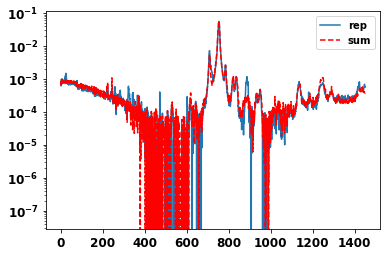

In [51]:
#%%
plt.semilogy(XRD_cluster_rep[1,:],label='rep')
plt.semilogy(XRD_cluster_rep_summed[1,:],'r--',label='sum')
plt.legend()

In [52]:
XRD_cluster_rep_summed=np.genfromtxt(path+'/'+'XRD_cluster_rep_summed.txt')
membership=np.genfromtxt(path+'/'+'membership.txt')

In [53]:
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

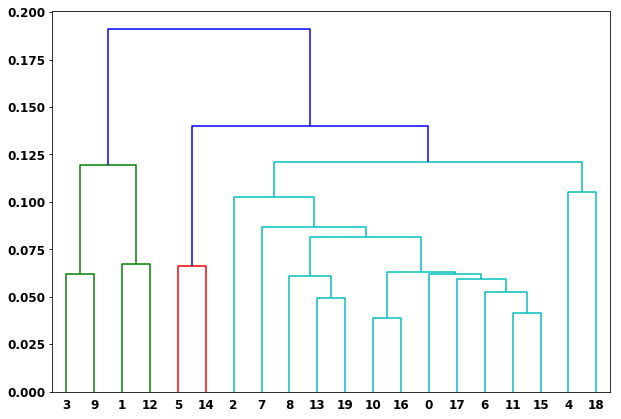

In [54]:
#%%
data=XRD_cluster_rep_summed[:]
dendogram_plot_xrd=plt.figure(figsize=(10, 7))  
#plt.title("Customer Dendograms")  
dend = shc.dendrogram(shc.linkage(data, method='complete')) 

In [55]:
#%%
n=10
cluster = AgglomerativeClustering(n_clusters=n, affinity='euclidean', linkage='complete')  
#cluster = AgglomerativeClustering(n_clusters=n, affinity='manhattan', linkage='complete')  
lables=cluster.fit_predict(data) 

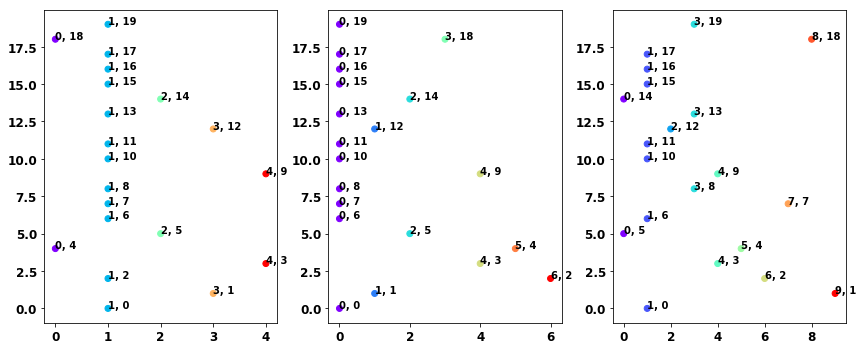

In [56]:
#%% Plot
rows_k=data.shape[0]
cluster_plot_xrd=plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
n=5
cluster = AgglomerativeClustering(n_clusters=n, affinity='euclidean', linkage='complete')  
#cluster = AgglomerativeClustering(n_clusters=n, affinity='manhattan', linkage='complete')  
lables=cluster.fit_predict(data) 
plt.scatter(lables,range(rows_k), c=cluster.labels_, cmap='rainbow')
for xy in zip(lables, range(rows_k)):
    plt.annotate('%s, %s' %xy, xy=xy, textcoords='data')

plt.subplot(1,3,2)
n=7
cluster = AgglomerativeClustering(n_clusters=n, affinity='euclidean', linkage='complete')  
#cluster = AgglomerativeClustering(n_clusters=n, affinity='manhattan', linkage='complete')  
lables=cluster.fit_predict(data) 
plt.scatter(lables,range(rows_k), c=cluster.labels_, cmap='rainbow')
for xy in zip(lables, range(rows_k)):
    plt.annotate('%s, %s' %xy, xy=xy, textcoords='data')
plt.subplot(1,3,3)
n=10
cluster = AgglomerativeClustering(n_clusters=n, affinity='euclidean', linkage='complete')  
#cluster = AgglomerativeClustering(n_clusters=n, affinity='manhattan', linkage='complete')  
lables=cluster.fit_predict(data) 
plt.scatter(lables,range(rows_k), c=cluster.labels_, cmap='rainbow')
for xy in zip(lables, range(rows_k)):
    plt.annotate('%s, %s' %xy, xy=xy, textcoords='data')

plt.tight_layout()

In [57]:
#%% Saveplots
dendogram_plot_xrd.savefig(path+'/'+'dendogram_plot_summ.png',dpi=300)
cluster_plot_xrd.savefig(path+'/'+'cluster_plot_summ.png',dpi=300)

In [58]:
#%%
def pl(*args):
    count=1
    for arg in args:
        plt.semilogy(q,XRD_cluster_rep_summed[arg]*3**count,label=arg)
        count+=1
    plt.legend(loc=1)
    plt.xlim(1.5,4.2)
    plt.draw()
    return plt.show()
#%%
def pl_ns(*args):
    count=1
    plt.figure(figsize=(16,5))
    for arg in args:
        plt.semilogy(q,XRD_cluster_rep_summed[arg],label=arg)
        count+=1
    plt.legend(loc=1)
    plt.xlim(2,4.2)
    plt.draw()
    return plt.show()

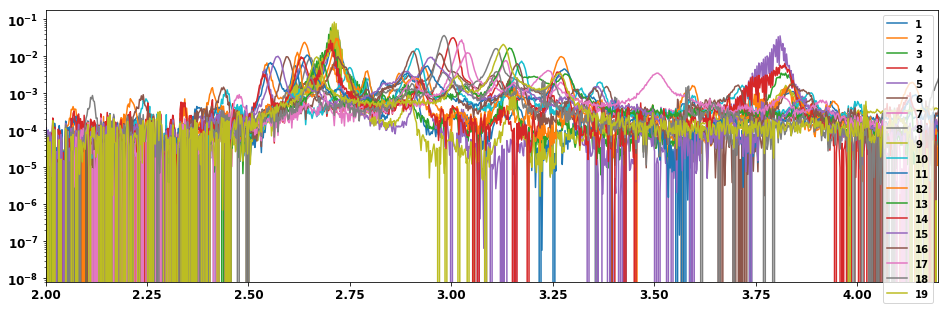

In [92]:
pl_ns(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19)

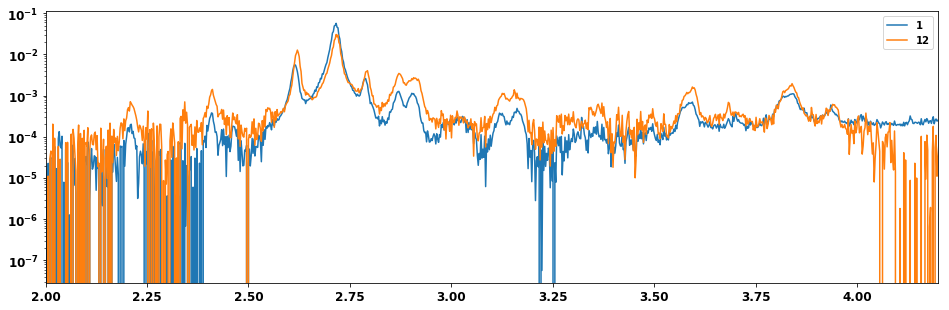

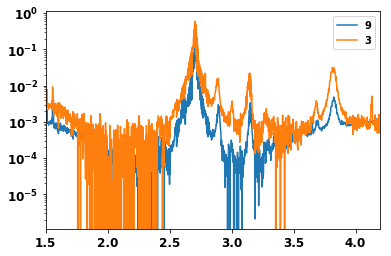

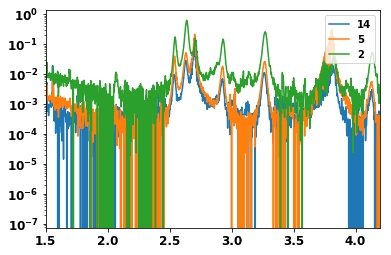

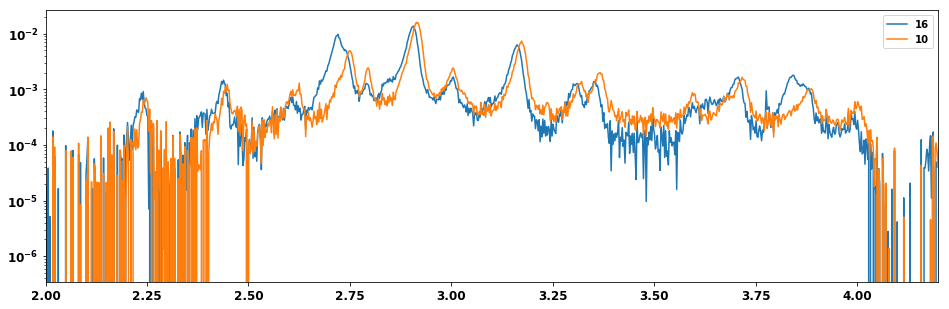

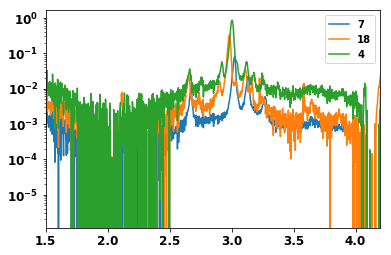

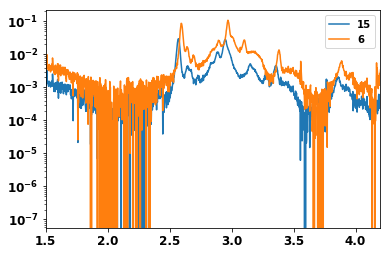

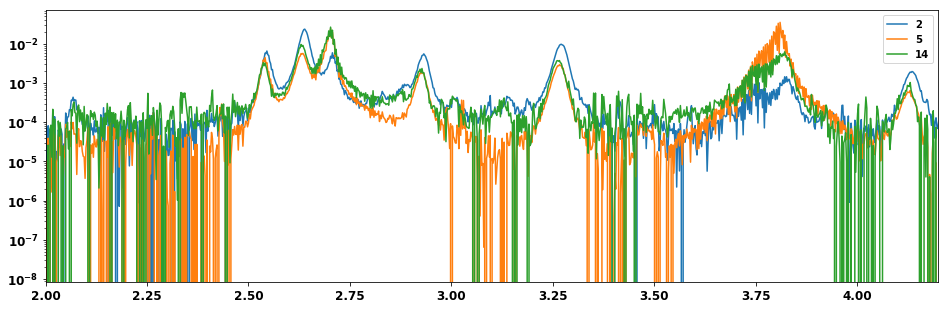

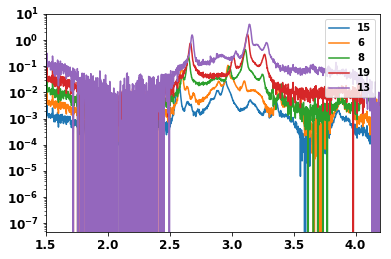

In [60]:
if sample_name=='110917A':
    pl(1,2,3,7,10,12,14,16,19)
    pl(6,4)
    pl(11,8)
    pl(15,17)
#For Co-Ti-Ta
if sample_name=='112417A':
    pl_ns(1,12)
    pl(9,3)
    pl(14,5,2)
    pl_ns(16,10)
    pl(7,18,4)
    pl(15,6)
    pl_ns(2,5,14)
    pl(15,6,8,19,13)

In [133]:
m_m=np.arange(k) #modified_membership
#change the membership
if sample_name=='110917A':
    np.put(m_m, [1,2,3,7,10,12,14,16,19], [1])
    np.put(m_m, [4,6], [4])
    np.put(m_m, [8,11], [8])
    np.put(m_m, [15,17], [15])
    merge_list=list(([0],
                 [1,2,3,7,10,12,14,16,19],
                 [4,6],
                 [5],
                 [8,11],
                 [9],
                 [13],
                 [15,17],
                 [18]))


# #for Co-Ti-Ta
if sample_name=='112417A':
    np.put(m_m, [1,12], [1])
    np.put(m_m, [2,5,14], [2])
    np.put(m_m, [4,7,18], [4])
    np.put(m_m, [6,15], [6])
    np.put(m_m, [8,13,19], [8])
    np.put(m_m, [3,9], [9])
    np.put(m_m, [10,16], [10])
    merge_list=list((#[0,],
                 [1,12],
                 [2,5,14],
                 [3,9],
                 [4,7,18],
                 [5,15],
                 [8,13,19],
                 [10,16],
                 [11],
                 [17]                ))

In [134]:
# merge_list=list(([0],
#                  [1,2,3,7,10,12,14,16,19],
#                  [4,6],
#                  [5],
#                  [8,11],
#                  [9],
#                  [13],
#                  [15,17],
#                  [18]))
# # merge_list for Co-Ti-Ta
# merge_list=list((#[0,],
#                  [1,12],
#                  [2,5,14],
#                  [3,9],
#                  [4,7,18],
#                  [5,15],
#                  [8,13,19],
#                  [10,16],
#                  [11],
#                  [17]                ))

In [135]:
n_clusters=len(merge_list)

In [136]:
#%% Merge memberships k to len(merge_list)
rows=datas.shape[0]
membership_merge_0=np.zeros((rows,n_clusters))
for i in range(len(merge_list)):
    for j in merge_list[i]:
#         print(j)
        membership_merge_0[:,i]+=membership[:,j]
membership_merge=membership_merge_0[:,:]

np.savetxt(path+'/'+sample_name+'_'+'membership_merge.txt',membership_merge)

In [137]:
membership_merge.shape

(1533, 9)

In [138]:
#%% Filter the high membership members only
membership_merge_filtered = np.ones_like(membership_merge)
membership_merge_filtered[:] = membership_merge
mask=(0.9>membership_merge)
membership_merge_filtered[mask]=0

In [139]:
#%% Generate a data set which representing all the clusters
XRD_n_cluster_rep=np.zeros((n_clusters,cols))
for i in range(n_clusters):
    XRD_n_cluster_rep[i,:]=datas[membership_merge[:,i].argmax(axis=0),:]

In [140]:
datas.shape, datas.shape, XRD_n_cluster_rep.shape,membership_merge.shape

((1533, 1450), (1533, 1450), (9, 1450), (1533, 9))

In [141]:
np.savetxt(path+'/'+'XRD_n_cluster_rep.txt',XRD_n_cluster_rep)

(1533, 3) (1533, 9) 9
order is 0 1 2 for CoTiTa
using existing axis
0 1 2 3 4 5 6 7 8

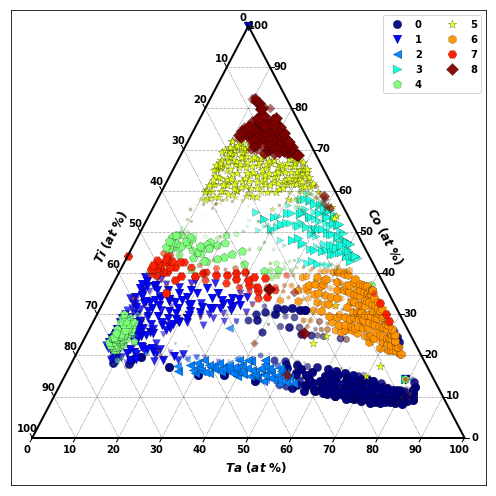

In [142]:
#%% ternary plot with modified_membership
plot_ternary_clusters_merged_membership=plt.figure(figsize=(7,7))
ax=pylab.subplot(1,1,1)

ax_ternary(A123, membership_merge, 9, ax=ax)

# setup_plot(ax, side_labels=[a1,a2,a3], grid_values=np.arange(0.1,1,0.1))

# for i in range(n_clusters):
#     alphas=membership_filtered[:,i]  # the fourth column needs to be your alphas
#     rgba_colors[:, 3] = alphas
#     ax.scatter(A123t[:,0],A123t[:,1],
# #                 marker='h',
#                  marker=markers[i],
#                  s=80*membership_merge_filtered[:,i],
# #                 s=50*membership_merge[:,i],
# #                  c=colors[i],
#                  lw=0.5,
#                  edgecolor='k',
#                  label=i
#                  );
# #    print('Cluster '+str(i))
# plt.legend(title="Cluster Number.",loc=2, borderaxespad=0,fontsize=15)
# plt.suptitle('Clusters mapped_together_membership>0.9_'+sample_name,fontsize=16)
plt.tight_layout()
plt.show()

In [143]:
plot_ternary_clusters_merged_membership.savefig(path+'/'+'plot_ternary_clusters_merged_membership.png',dpi=300,bbox_inches='tight')

In [144]:
A123t.shape

(1533, 2)

In [145]:
A123_test=np.array([[60,30,10],[95,5,0]])
A123t_test=transform(A123_test[:,0:3],basis)

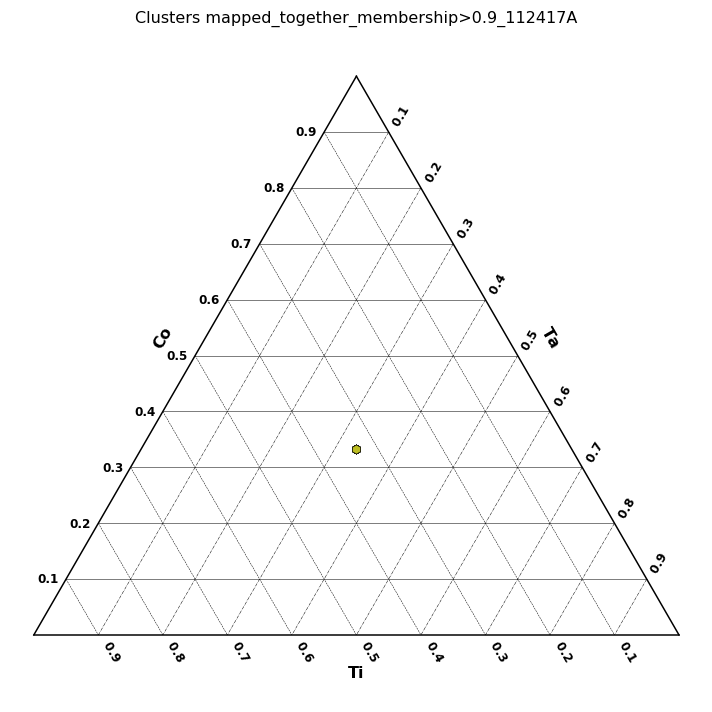

In [146]:
#%% ternary plot with modified_membership
plot_ternary_clusters_merged_membership=plt.figure(figsize=(10,10))
ax=plt.subplot(1,1,1)
setup_plot(ax, side_labels=[a1,a2,a3], grid_values=np.arange(0.1,1,0.1))

for i in range(n_clusters):
    alphas=membership_filtered[:,i]  # the fourth column needs to be your alphas
    rgba_colors[:, 3] = alphas
    ax.scatter(A123t_test[:,0],A123t_test[:,1],
                 marker='h',
                 s=80,
                 lw=0.5,
                 edgecolor='k'
                 );
#    print('Cluster '+str(i))
# plt.legend(title="Cluster Number.",loc=2, borderaxespad=0,fontsize=15)
plt.suptitle('Clusters mapped_together_membership>0.9_'+sample_name,fontsize=16)
plt.tight_layout()
plt.show()

In [147]:
# #%% 
# plot_wafer_clusters_merged_membership=plt.figure(figsize=(11,11))
# ax=pylab.subplot(1,1,1)
# circle1=plt.Circle((0,0),51,edgecolor='k',lw=1,facecolor='None')
# plt.gcf().gca().add_artist(circle1)
# for i in range(n_clusters):
#     alphas=membership[:,i]  # the fourth column needs to be your alphas
#     rgba_colors[:, 3] = alphas
#     if i==m_m[i]:
#         mylabel=i
#     else:
#         mylabel=None

#     ax.scatter(xrd_xy[:,0],xrd_xy[:,1],
#                  marker='o',
# #                 marker=markers_1[i],
#                  s=120*membership_merge_filtered[:,i],
# #                 s=50*membership_merge[:,i],
# #                  c=colors_1[i],
#                  lw=0.3,
#                  edgecolor='k',
#                  label=i
#                  );
# #    print('Cluster '+str(i))

# plt.title('Clusters mapped_together_'+sample_name,y=1.01,fontsize=16)
# plt.xlabel('x (mm)')
# plt.ylabel('y (mm)')
# ax.set_aspect('equal')
# plt.xlim(-53,53)
# plt.ylim(-53,53)
# plt.legend(title="Cluster Number.",bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0,fontsize=14)
# plt.tight_layout()
# plt.show()

In [148]:
# plot_wafer_clusters_merged_membership.savefig(path+'/'+'plot_wafer_clusters_merged_membership.png',dpi=200,bbox_inches='tight')

In [149]:
# #%% 
# plot_wafer_clusters_merged_membership_markers=plt.figure(figsize=(11,11))
# ax=pylab.subplot(1,1,1)
# circle1=plt.Circle((0,0),51,edgecolor='k',lw=1,facecolor='None')
# plt.gcf().gca().add_artist(circle1)
# for i in range(n_clusters):
#     alphas=membership[:,i]  # the fourth column needs to be your alphas
#     rgba_colors[:, 3] = alphas
#     if i==m_m[i]:
#         mylabel=i
#     else:
#         mylabel=None

#     ax.scatter(xrd_xy[:,0],xrd_xy[:,1],
# #                  marker='o',
#                  marker=markers[i],
#                  s=120*membership_merge_filtered[:,i],
# #                 s=50*membership_merge[:,i],
# #                  c=colors[i],
#                  lw=0.3,
#                  edgecolor='k',
#                  label=i
#                  );
# #    print('Cluster '+str(i))

# plt.title('Clusters mapped_together_'+sample_name,y=1.01,fontsize=16)
# plt.xlabel('x (mm)')
# plt.ylabel('y (mm)')
# ax.set_aspect('equal')
# plt.xlim(-53,53)
# plt.ylim(-53,53)
# plt.legend(title="Cluster Number.",bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0,fontsize=14)
# plt.tight_layout()
# plt.show()

In [150]:
# plot_wafer_clusters_merged_membership_markers.savefig(path+'/'+'plot_wafer_clusters_merged_membership_markers.png',dpi=200,bbox_inches='tight')

In [151]:
#%%
def pl_n(*args):
    count=1
    for arg in args:
        plt.semilogy(q,XRD_n_cluster_rep[arg]*3**count,label=arg)
        count+=1
    plt.legend(loc=1)
    plt.xlim(1.5,4.2)
#     plt.yticks([])
    plt.xlabel('Q ($\AA^{-1}$)')
    plt.ylabel('Counts(a.u)')
    plt.draw()
    return plt.show()
#%%

In [152]:
# #%% plot
# plot_XRD_n_seperate=plt.figure(figsize=(12,10))
# count=1
# for i in range(n_clusters):
#     plt.subplot(4,3,count)
#     plt.plot(q,XRD_n_cluster_rep[i],label='Phase '+str(i))
#     count+=1
#     plt.xlim(1,4.2)
# #    plt.ylim(.1,1e3)
#     plt.xlabel('Q ($\AA^{-1}$)')
#     plt.ylabel('Counts(a.u)')
#     plt.legend()
# plt.tight_layout()
# plt.show()

In [153]:
# plot_XRD_n_seperate.savefig(path+'/'+'plot_XRD_n_seperate.png',dpi=300,bbox_inches='tight')

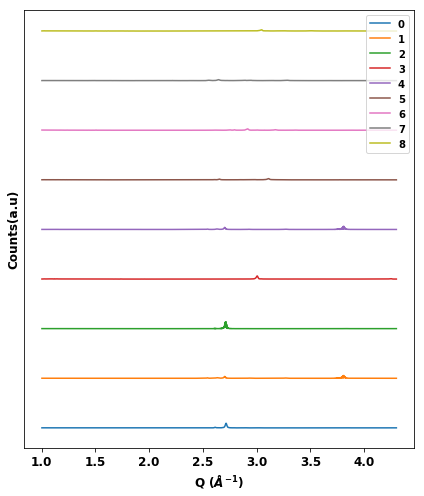

In [154]:
#%% together plot
plot_XRD_n_together=plt.figure(figsize=(6,7))
mul=1
for i in range(n_clusters):
    plt.plot(q,XRD_n_cluster_rep[i]+2*mul,label=i)
    mul+=0.3
# plt.xlim(1,4.2)
#    plt.ylim(.1,1e3)
plt.yticks([])
plt.xlabel('Q ($\AA^{-1}$)')
plt.ylabel('Counts(a.u)')
plt.legend(loc=1)
plt.tight_layout()
plt.show()

In [155]:
plot_XRD_n_together.savefig(path+'/'+'plot_XRD_n_together.png',dpi=300,bbox_inches='tight')

In [156]:
membership_merge.shape,n_clusters

((1533, 9), 9)

In [157]:
xrd_xy.shape,A123.shape

((1533, 2), (1533, 3))

In [158]:
#%% Get together xrd data for each cluster in seperate vasiable
for i in range(n_clusters):
    mask = (0.9 < membership_merge[:,i])
    globals()['cluster_%s' %i] = datas[mask,:] 
    globals()['cluster_%s' %i] = np.hstack((xrd_xy[mask,:],A123[mask,:],datas[mask,:]))
    print(globals()['cluster_%s' %i].shape) 
    np.savetxt(path+'/'+'XRD_data_cluster_'+str(i)+'_of_n.txt',globals()['cluster_%s' %i],comments="This data contains xy, atomic ratios and xrd.")
    #This data contains xy, atomic ratios and xrd

(125, 1455)
(160, 1455)
(59, 1455)
(65, 1455)
(84, 1455)
(157, 1455)
(125, 1455)
(40, 1455)
(73, 1455)


In [159]:
cluster_0[10,5:].shape

(1450,)

In [160]:
# #%% Sort and plot the cluster of interest
# #plot

# for j in range(n_clusters):
#     count=1
#     globals()['Plot_cluster_%s' %j]=plt.figure(figsize=(16,6))
# #   Sort hte data acording to a1 (Co)
#     plt.subplot(1,4,1)
#     for i in range(globals()['cluster_%s' %j].shape[0]):
#         plt.scatter(q,ones*globals()['cluster_%s' %j][i,2],
# #         plt.scatter(q,one,
#                     marker='|',
#                     s=50,
#                     c=globals()['cluster_%s' %j][i,5:],
#                     norm=mpl.colors.LogNorm()
#                     )
#     plt.xlim(1,4.2)
#     plt.ylabel('%s'%comps[0]+'(%)')
#     plt.xlabel('Q ($\AA^{-1}$)')
#     plt.title("%s"%comps[0]+'%')
# #   Sort hte data acording to a2 (Ni)
#     plt.subplot(1,4,2)
#     for i in range(globals()['cluster_%s' %j].shape[0]):
#         plt.scatter(q,ones*globals()['cluster_%s' %j][i,3],
#                     marker='|',
#                     s=50,
#                     c=globals()['cluster_%s' %j][i,5:],
#                     norm=mpl.colors.LogNorm()
#                     )
#     plt.xlim(1,4.2)
#     plt.ylabel('%s'%comps[1]+'(%)')
#     plt.xlabel('Q ($\AA^{-1}$)')
#     plt.title("%s "%comps[1]+'%')
# #   Sort hte data acording to a3 (Ta)
#     plt.subplot(1,4,3)
#     for i in range(globals()['cluster_%s' %j].shape[0]):
#         plt.scatter(q,ones*globals()['cluster_%s' %j][i,4],
#                     marker='|',
#                     s=50,
#                     c=globals()['cluster_%s' %j][i,5:],
#                     norm=mpl.colors.LogNorm()
#                     )
#     plt.xlim(1,4.2)
#     plt.ylabel('%s'%comps[2]+'(%)')
#     plt.xlabel('Q ($\AA^{-1}$)')
#     plt.title("%s "%comps[2]+'%')

#     plt.subplot(1,4,4)
#     for i in range(globals()['cluster_%s' %j].shape[0]):
#         plt.scatter(q,ones*count,
#                     marker='|',
#                     s=50,
#                     c=globals()['cluster_%s' %j][i,5:],
#                     norm=mpl.colors.LogNorm()
#                     )
#         count+=1
#     plt.xlim(1,4.2)
#     plt.xlabel('Q ($\AA^{-1}$)')
#     plt.ylabel('(a.u)')
#     plt.colorbar(shrink=0.4,aspect=8)
#     plt.title("Scan # in the cluster_"+str(j))    
#     plt.suptitle('Cluster_'+str(j))

#     plt.tight_layout()
    
#     globals()['Plot_cluster_%s' %j].savefig(path+'/'+'XRD_data_plot_cluster_'+str(j)+'.png')

In [161]:
# # get approximate atomic composition of the each phase by taking the avarage of the members of the cluster
# n_ratios_approx=np.zeros((n_clusters,3))
# for i in range(n_clusters):
#     n_ratios_approx[i,:]=[
#         '%3.2f' % (0.01*sum(globals()['cluster_%s' %i][:,2])/globals()['cluster_%s' %i].shape[0]),
#         '%3.2f' % (0.01*sum(globals()['cluster_%s' %i][:,3])/globals()['cluster_%s' %i].shape[0]),
#         '%3.2f' % (0.01*sum(globals()['cluster_%s' %i][:,4])/globals()['cluster_%s' %i].shape[0])
#     ]
# n_ratios_approx
    

In [162]:
# XRD_n_cluster_rep.shape

In [163]:
# for i in range(n_clusters):
#     pl_n_fig=plt.figure()
#     plt.plot(q,XRD_n_cluster_rep[i,:],label=i)
#     plt.legend(loc=1)
#     plt.xlim(1.5,4.2)
#     plt.ylim(np.amin(datas),np.amax(datas))
# #     plt.yticks([])
#     plt.xlabel('Q ($\AA^{-1}$)')
#     plt.ylabel('Counts(a.u)')
#     plt.text(3.5, 0.25, n_ratios_approx[i])
#     plt.show()    
#     pl_n_fig.savefig(path+'/'+'clusters_merged_'+str(i)+'_of_'+str(n_clusters)+'.png',dpi=300)